<a href="https://colab.research.google.com/github/pragyan2905/DataSage-AI/blob/main/Multi_sectoral_inflation_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
inflation_df = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_122376.csv', skiprows=4)

cpi_df = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_122376.csv', skiprows=4)


In [37]:
# Select only the columns that are years
year_columns = [col for col in inflation_df.columns if col.isdigit()]
country_name_column = ['Country Name']
columns_to_melt = country_name_column + year_columns

# Melt the dataframes using only the year columns
inflation_long = pd.melt(inflation_df[columns_to_melt], id_vars=['Country Name'], var_name='Year', value_name='Inflation')
cpi_long = pd.melt(cpi_df[columns_to_melt], id_vars=['Country Name'], var_name='Year', value_name='CPI')

print("Corrected Melted Inflation Dataframe:")
display(inflation_long.head())

print("\nCorrected Melted CPI Dataframe:")
display(cpi_long.tail())

Corrected Melted Inflation Dataframe:


,Country Name,Year,Inflation
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN



Corrected Melted CPI Dataframe:


,Country Name,Year,CPI
17285,Kosovo,2024,1.619450
17286,"Yemen, Rep.",2024,NaN
17287,South Africa,2024,4.361152
17288,Zambia,2024,14.985626
17289,Zimbabwe,2024,NaN


In [38]:
merged_df = pd.merge(inflation_long, cpi_long, on=['Country Name', 'Year'])
display(merged_df.head())

,Country Name,Year,Inflation,CPI
0,Aruba,1960,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN
2,Afghanistan,1960,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN
4,Angola,1960,NaN,NaN


In [41]:
median_inflation = merged_df['Inflation'].median()
merged_df['Inflation'].fillna(median_inflation, inplace=True)
medina_cpi = merged_df['CPI'].median()
merged_df['CPI'].fillna(medina_cpi, inplace=True)
display(merged_df.tail())

/tmp/ipython-input-2444567920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Inflation'].fillna(median_inflation, inplace=True)
/tmp/ipython-input-2444567920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,Country Name,Year,Inflation,CPI
17285,Kosovo,2024,1.619450,1.619450
17286,"Yemen, Rep.",2024,4.869397,4.869397
17287,South Africa,2024,4.361152,4.361152
17288,Zambia,2024,14.985626,14.985626
17289,Zimbabwe,2024,4.869397,4.869397


In [42]:
new_df = pd.read_csv("global_inflation_data.csv")
display(new_df.head())

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [43]:
# Melt the new_df dataframe
new_df_long = pd.melt(new_df, id_vars=['country_name', 'indicator_name'], var_name='Year', value_name='Value')

# Rename columns for consistency
new_df_long = new_df_long.rename(columns={'country_name': 'Country Name'})

# Merge with the existing merged_df
final_merged_df = pd.merge(merged_df, new_df_long, on=['Country Name', 'Year'], how='inner')


print("Final Merged Dataframe:")
display(final_merged_df.head())

Final Merged Dataframe:


,Country Name,Year,Inflation,CPI,indicator_name,Value
0,Aruba,1980,4.869397,4.869397,Annual average inflation (consumer prices) rate,NaN
1,Afghanistan,1980,4.869397,4.869397,Annual average inflation (consumer prices) rate,13.4
2,Angola,1980,4.869397,4.869397,Annual average inflation (consumer prices) rate,46.7
3,Albania,1980,4.869397,4.869397,Annual average inflation (consumer prices) rate,NaN
4,Andorra,1980,4.869397,4.869397,Annual average inflation (consumer prices) rate,NaN


In [44]:
# Drop the 'CPI' column
final_merged_df = final_merged_df.drop(columns=['CPI'])

# Calculate the median of the 'Value' column
median_value = final_merged_df['Value'].median()

# Fill NaN values in the 'Value' column with the median
final_merged_df['Value'].fillna(median_value, inplace=True)

print("Dataframe after dropping 'CPI' and filling missing values:")
display(final_merged_df.head())

print("\nMissing values after cleaning:")
print(final_merged_df.isnull().sum())

Dataframe after dropping 'CPI' and filling missing values:


/tmp/ipython-input-1799563974.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_df['Value'].fillna(median_value, inplace=True)


,Country Name,Year,Inflation,indicator_name,Value
0,Aruba,1980,4.869397,Annual average inflation (consumer prices) rate,4.7
1,Afghanistan,1980,4.869397,Annual average inflation (consumer prices) rate,13.4
2,Angola,1980,4.869397,Annual average inflation (consumer prices) rate,46.7
3,Albania,1980,4.869397,Annual average inflation (consumer prices) rate,4.7
4,Andorra,1980,4.869397,Annual average inflation (consumer prices) rate,4.7



Missing values after cleaning:
Country Name      0
Year              0
Inflation         0
indicator_name    0
Value             0
dtype: int64


In [48]:
print("Dataframe after dropping 'indicator_name' and renaming 'Value' column:")
display(final_merged_df.head())

Dataframe after dropping 'indicator_name' and renaming 'Value' column:


,Country Name,Year,Inflation,cpi
0,Aruba,1980,4.869397,4.7
1,Afghanistan,1980,4.869397,13.4
2,Angola,1980,4.869397,46.7
3,Albania,1980,4.869397,4.7
4,Andorra,1980,4.869397,4.7


In [49]:
final_merged_df.tail()

,Country Name,Year,Inflation,cpi
7690,Samoa,2024,2.172455,5.0
7691,Kosovo,2024,1.619450,3.1
7692,South Africa,2024,4.361152,4.8
7693,Zambia,2024,14.985626,9.6
7694,Zimbabwe,2024,4.869397,222.4


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

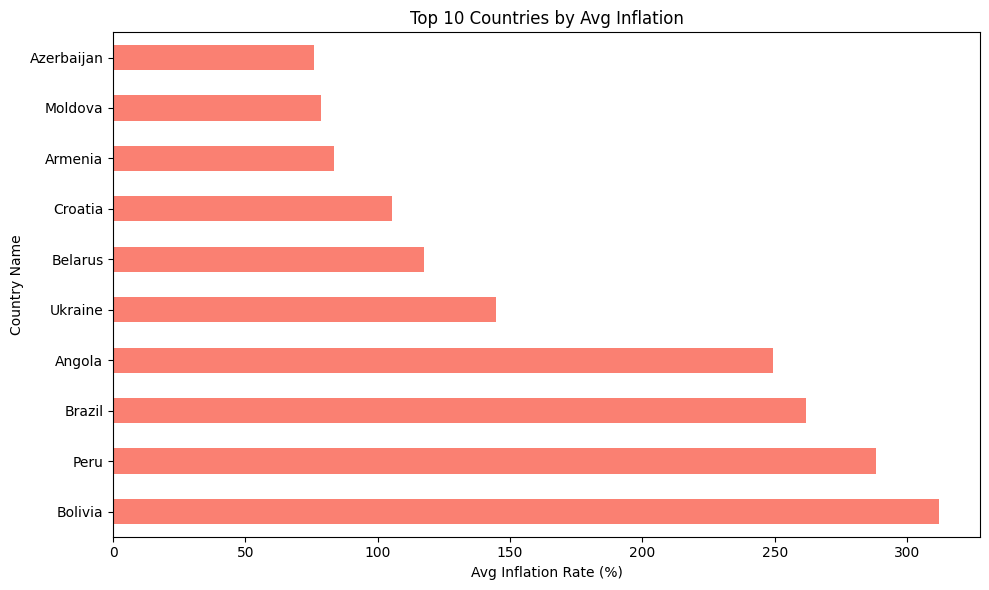

In [57]:
top_inf = final_merged_df.groupby("Country Name")["Inflation"].mean().nlargest(10)

top_inf.plot(kind="barh", figsize=(10, 6), color="salmon", title="Top 10 Countries by Avg Inflation")
plt.xlabel("Avg Inflation Rate (%)")
plt.tight_layout()
plt.show()



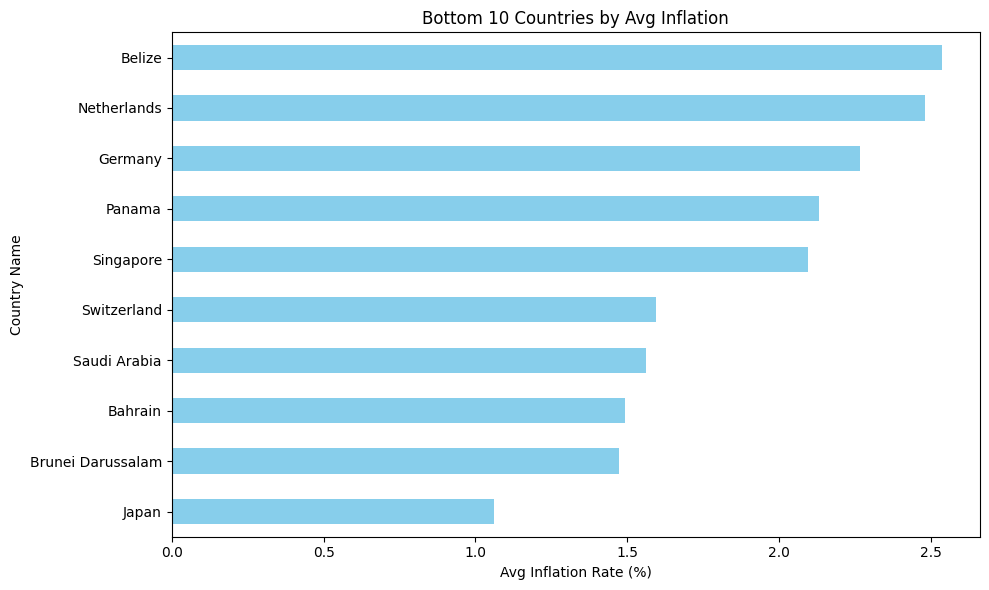

In [59]:
bottom_inf = final_merged_df.groupby("Country Name")["Inflation"].mean().nsmallest(10)

bottom_inf.plot(kind="barh", figsize=(10, 6), color="skyblue", title="Bottom 10 Countries by Avg Inflation")
plt.xlabel("Avg Inflation Rate (%)")
plt.tight_layout()
plt.show()


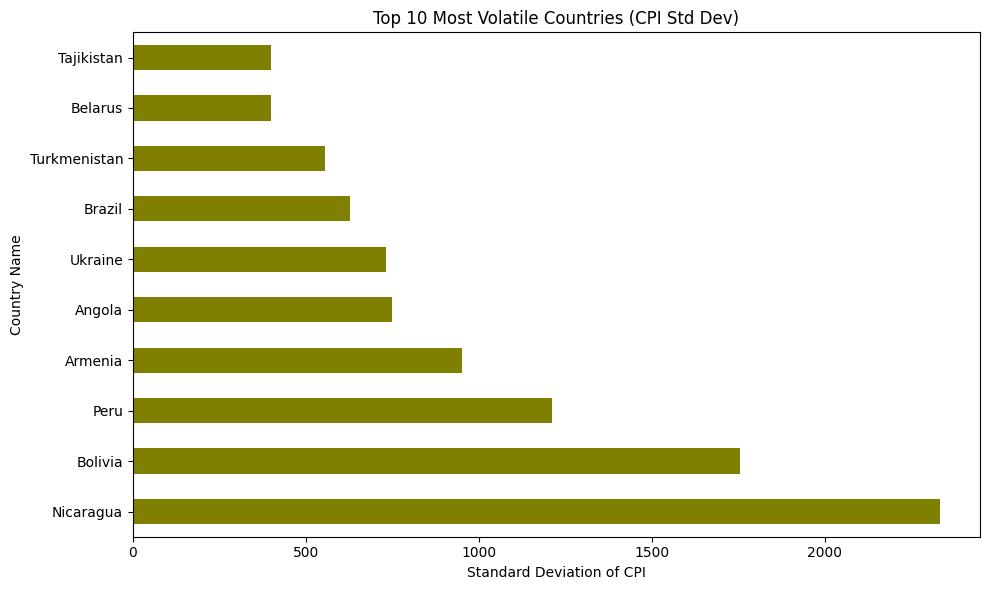

In [63]:
cpi_vol = final_merged_df.groupby("Country Name")["cpi"].std().nlargest(10)
cpi_vol.plot(kind='barh', figsize=(10,6), color='olive', title="Top 10 Most Volatile Countries (CPI Std Dev)")
plt.xlabel("Standard Deviation of CPI")
plt.tight_layout()
plt.show()


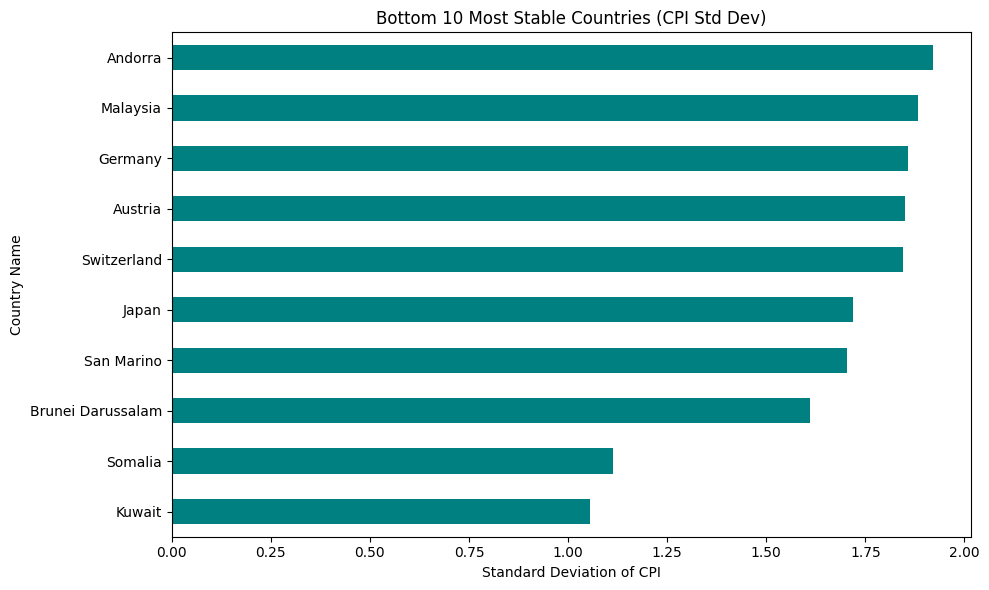

In [65]:
cpi_vol_bottom = final_merged_df.groupby("Country Name")["cpi"].std().nsmallest(10)

cpi_vol_bottom.plot(kind='barh', figsize=(10,6), color='teal', title="Bottom 10 Most Stable Countries (CPI Std Dev)")
plt.xlabel("Standard Deviation of CPI")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1331813710.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


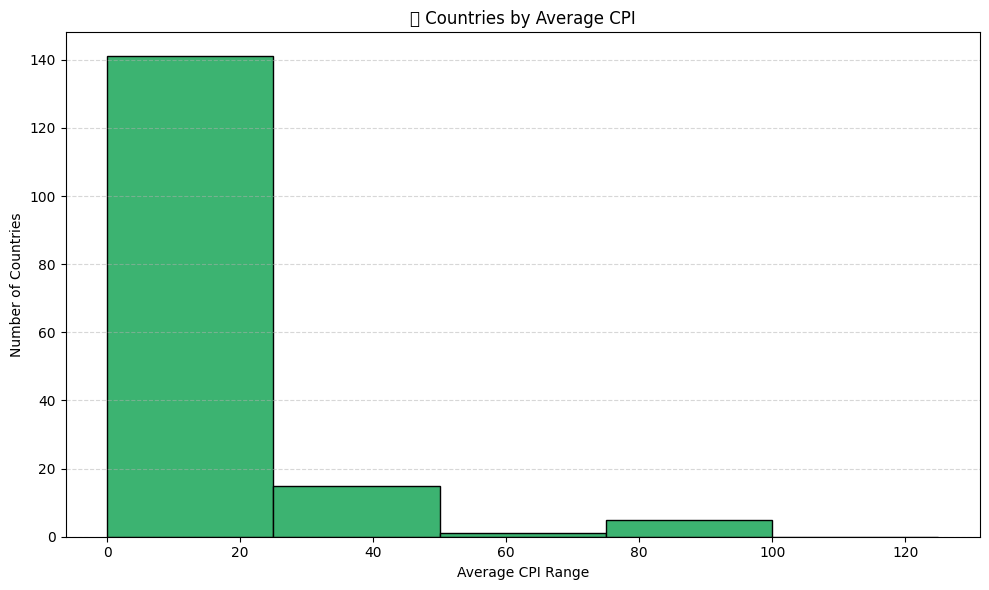

In [71]:
# Calculate average CPI per country for Year 2000–2024
filtered_df = final_merged_df.loc[(final_merged_df["Year"] >= 1980) & (final_merged_df["Year"] <= 2024)]
avg_cpi = filtered_df.groupby("Country Name")["cpi"].mean()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(avg_cpi, bins=[0, 25, 50, 75, 100, 125], color='mediumseagreen', edgecolor='black')
plt.title("📊 Countries by Average CPI")
plt.xlabel("Average CPI Range")
plt.ylabel("Number of Countries")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2591756589.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


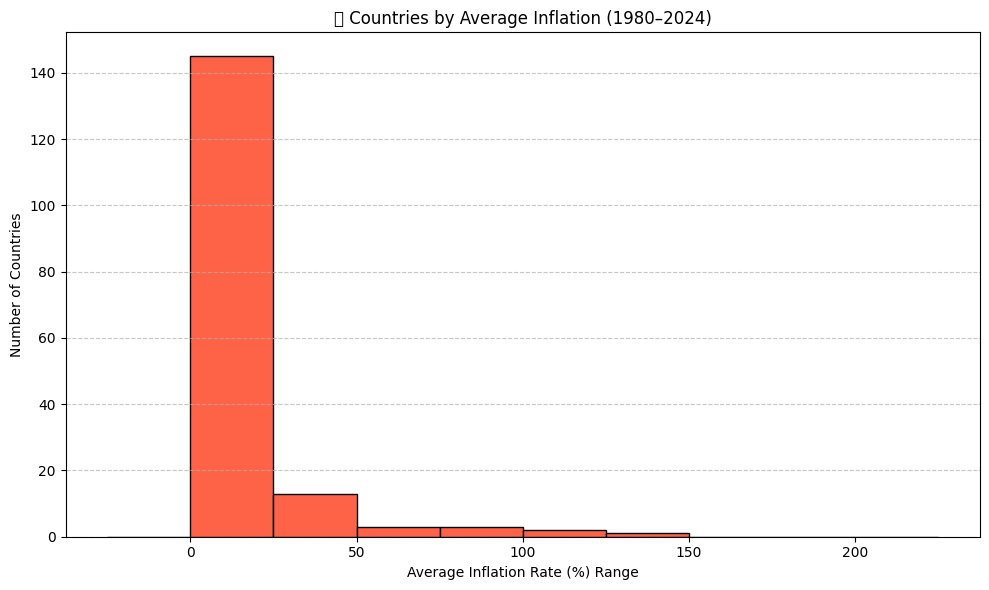

In [73]:
# Calculate average inflation per country for Year 2000–2024
avg_inflation = filtered_df.groupby("Country Name")["Inflation"].mean()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(avg_inflation, bins=[-25,0,25,50,75,100,125,150,175,200,225
                              ], color='tomato', edgecolor='black')
plt.title("📊 Countries by Average Inflation (1980–2024)")
plt.xlabel("Average Inflation Rate (%) Range")
plt.ylabel("Number of Countries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
